Based on Taylor (2001) - Journal Geophysical Research (http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract)

In [87]:
#!/usr/bin/python
# _*_ coding: latin-1 -*-
# Taylor Diagram - Based on Taylor (2001) - Journal Geophysical Research
# author: Mabel Calim Costa
# GMAO - INPE
# 20/02/2018

import numpy as np
from numpy import ma
import mpl_toolkits.axisartist.grid_finder as GF
import mpl_toolkits.axisartist.floating_axes as FA
import matplotlib.pyplot as plt
import netCDF4

In [2]:
def load_nc(file,var):
	"""
  	Open ARCHIVE .nc
	file  = archive.nc
	var   = variable from archive.nc
	"""
	f = netCDF4.Dataset(file,'r+')
	dara = f.variables[var][:]
	f.close()
	return data


In [85]:
def Taylor_diag(series, names):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: series     - dict with all time series (lists) to analyze  
               series[0]  - is the observation, the reference by default.
    """
    corr,std ={},{}
    for i in series.keys():
        corr[i] = ma.corrcoef(series[0],series[i])[1,0]
        std[i] = ma.std(series[i])/ma.std(series[0])
       
    ref = 1# ma.std(series[0])
    #print corr
    
    rlocs = np.concatenate((np.arange(0,-10,-0.25),[-0.95,-0.99],np.arange(0,10,0.25),[0.95,0.99]))
    str_rlocs = np.concatenate((np.arange(0,10,0.25),[0.95,0.99],np.arange(0,10,0.25),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax = 2.5

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi, # 1st quadrant
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    
   
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = FA.FloatingSubplot(fig, 111, grid_helper=ghelper)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation Coefficient")

    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation")

    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
    #ax.axis["right"].label.set_text("Standard Deviation")

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi)
    r = np.zeros_like(t) + ref
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi))

    
    rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    CS =ax.contour(ts, rs,rms, cmap=cm.bone)
    plt.clabel(CS, inline=1, fontsize=10)
    

    ax.plot(np.arccos(0.9999),ref,'k',marker='*',ls='', ms=10)
    aux = range(1,len(corr))
    #del aux[ref]


    
    colors = plt.matplotlib.cm.jet(np.linspace(0,1,len(corr)))
    
    for i in aux:
        ax.plot(np.arccos(corr[i]), std[i],c=colors[i],alpha =0.7,ms=15,marker='o',label=" %s" %names[i])
        ax.text(np.arccos(corr[i]), std[i],"%s"%i, fontsize=12)
    legend(bbox_to_anchor=(1.5, 1),prop=dict(size='large'),loc='best')
    plt.savefig('example2.png', dpi=300)
    return


In [48]:
import numpy as np
from pylab import *
z = np.linspace(0,2048,2048)
x = np.sin(50*np.pi*z)
y = np.cos(50*np.pi*z)
x2 = 2*np.sin(50*np.pi*z)
#x3 = 0*np.sin(50*np.pi*z)

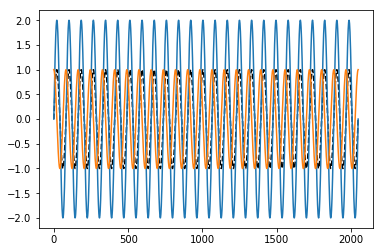

In [84]:
plot(x, 'k--')
plot(x2)
plot(y)



In [50]:
series ={}
series[0] = x  # the first term will be always the reference signal 
series[1]= x2
series[2]= y


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos


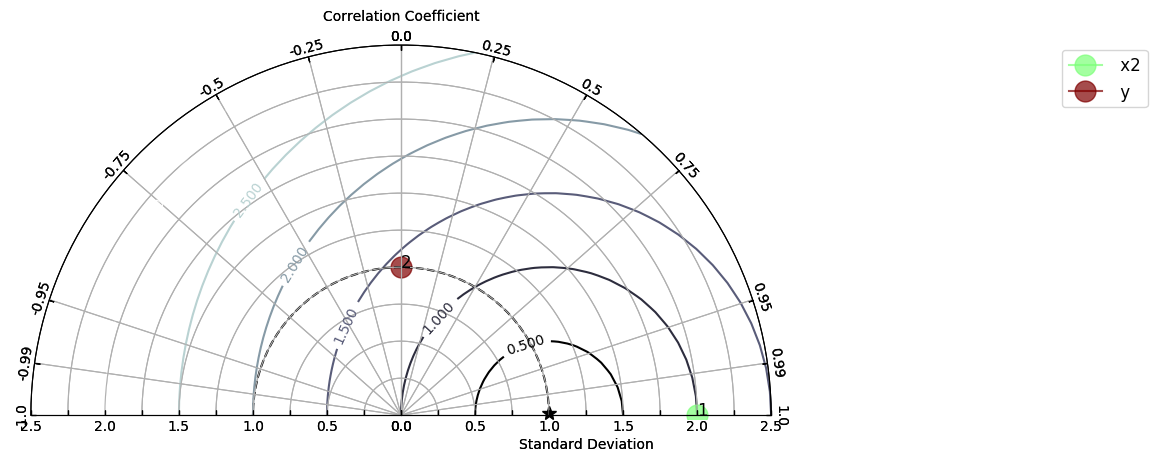

In [75]:
Taylor_diag(series,['x','x2','y'])

In [86]:
PolarAxes.PolarTransform()